In [257]:
import numpy as np
import pandas as pd

In [258]:
df = pd.read_csv('spam_dataset.csv', encoding="ISO-8859-1")
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2217,ham,* Will have two more cartons off u and is very pleased with shelves,NaN,NaN,NaN
2719,ham,Go where n buy? Juz buy when we get there lar.,NaN,NaN,NaN
434,ham,You available now? I'm like right around hillsborough &amp; &lt;#&gt; th,NaN,NaN,NaN
4847,ham,S.this will increase the chance of winning.,NaN,NaN,NaN
4317,ham,S...i will take mokka players only:),NaN,NaN,NaN


In [259]:
df.shape

(5572, 5)

# Steps to Follow
1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvements
7. Website
8. Deploy on Heroku


## 1. Data Cleaning

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [261]:
# Drop last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [262]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


In [263]:
# Renaming the cols
df.rename(columns={'v1': 'target',
                   'v2': 'text'}, inplace=True)

In [264]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


In [265]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [266]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"


In [267]:
# Missing Values 
df.isnull().sum()

target    0
text      0
dtype: int64

In [268]:
# Check for duplicate values
df.duplicated().sum()

403

In [269]:
# remove duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [270]:
df.shape

(5169, 2)

## 2. Exploratory Data Analysis (EDA)

In [271]:
# Build curiosity
# What percentage of spam and ham is present
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

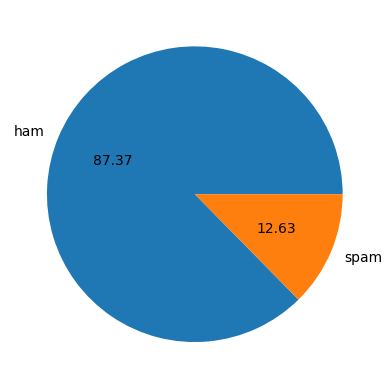

In [272]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [273]:
# Conclusion - Data is imbalance

In [274]:
# Count the alphabets(characters), words and sentences in the given text
# Creating 3 new cols
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\15105/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [275]:
# no. of characters used
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [276]:
df['num_characters'] = df['text'].apply(len)

C:\Users\15105\AppData\Local\Temp\ipykernel_20412\3217166257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [277]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives around here though",61


In [278]:
# no. of words
df['text'].apply(lambda x: nltk.word_tokenize(x))

0                                                                     [Go, until, jurong, point, ,, crazy, .., Available, only, in, bugis, n, great, world, la, e, buffet, ..., Cine, there, got, amore, wat, ...]
1                                                                                                                                                                         [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, FA, Cup, final, tkts, 21st, May, 2005, ., Text, FA, to, 87121, to, receive, entry, question, (, std, txt, rate, ), T, &, C, 's, apply, 08452810075over18, 's]
3                                                                                                                                                [U, dun, say, so, early, hor, ..., U, c, already, then, say, ...]
4                                                                                                                                  [Nah, I, do, n't, think, 

In [279]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\15105\AppData\Local\Temp\ipykernel_20412\474503136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [280]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives around here though",61,15


In [281]:
# no. of sentences
df['text'].apply(lambda x: nltk.sent_tokenize(x))

0                                                           [Go until jurong point, crazy.., Available only in bugis n great world la e buffet... Cine there got amore wat...]
1                                                                                                                                             [Ok lar..., Joking wif u oni...]
2               [Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005., Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's]
3                                                                                                                          [U dun say so early hor... U c already then say...]
4                                                                                                              [Nah I don't think he goes to usf, he lives around here though]
                                                                                         ...                                 

In [282]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\15105\AppData\Local\Temp\ipykernel_20412\3308873568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [283]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives around here though",61,15,1


In [284]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [285]:
df[df['target'] == 0]

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives around here though",61,15,1
6,0,Even my brother is not like to speak with me. They treat me like aids patent.,77,18,2
...,...,...,...,...,...
5565,0,Huh y lei...,12,4,1
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other suggestions?",57,15,2
5570,0,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,125,27,1


In [286]:
df.query('target == 0')[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [287]:
df.query('target == 1')[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

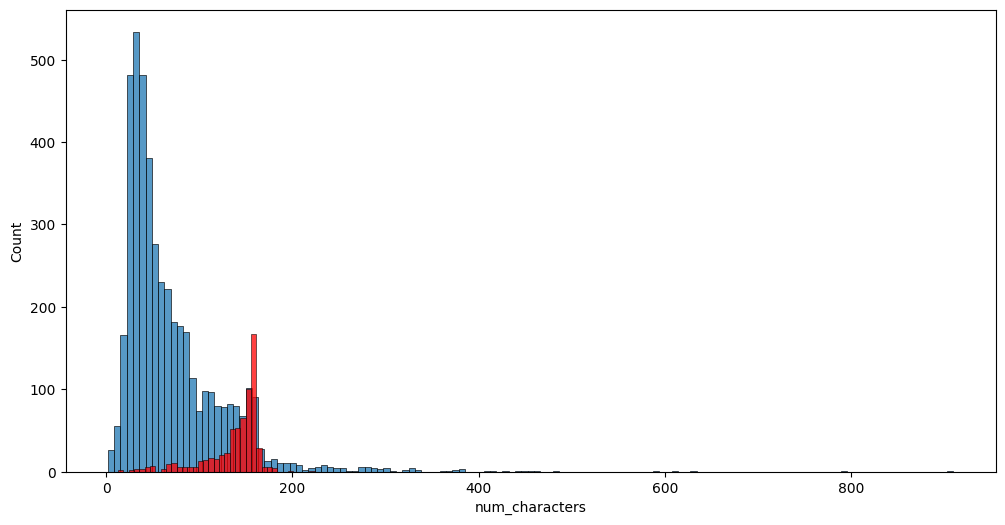

In [288]:
# Let's plot both these categories
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df.query('target == 0')['num_characters'])
sns.histplot(df.query('target == 1')['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

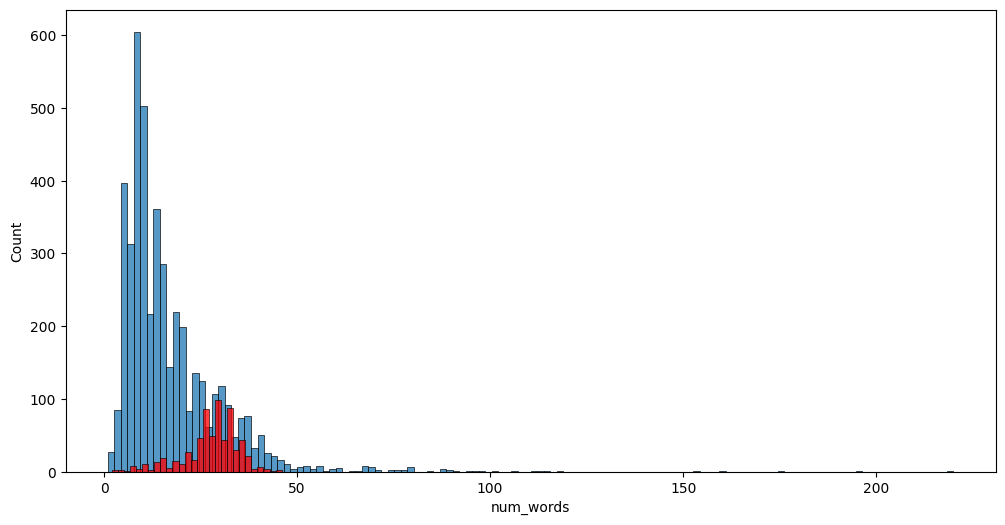

In [289]:
plt.figure(figsize=(12, 6))
sns.histplot(df.query('target == 0')['num_words'])
sns.histplot(df.query('target == 1')['num_words'], color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

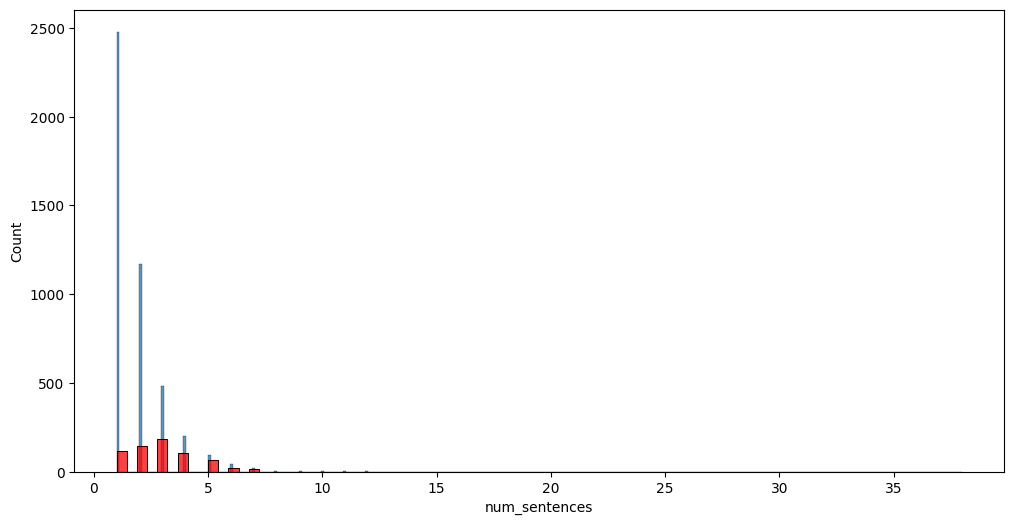

In [290]:
plt.figure(figsize=(12, 6))
sns.histplot(df.query('target == 0')['num_sentences'])
sns.histplot(df.query('target == 1')['num_sentences'], color='red')

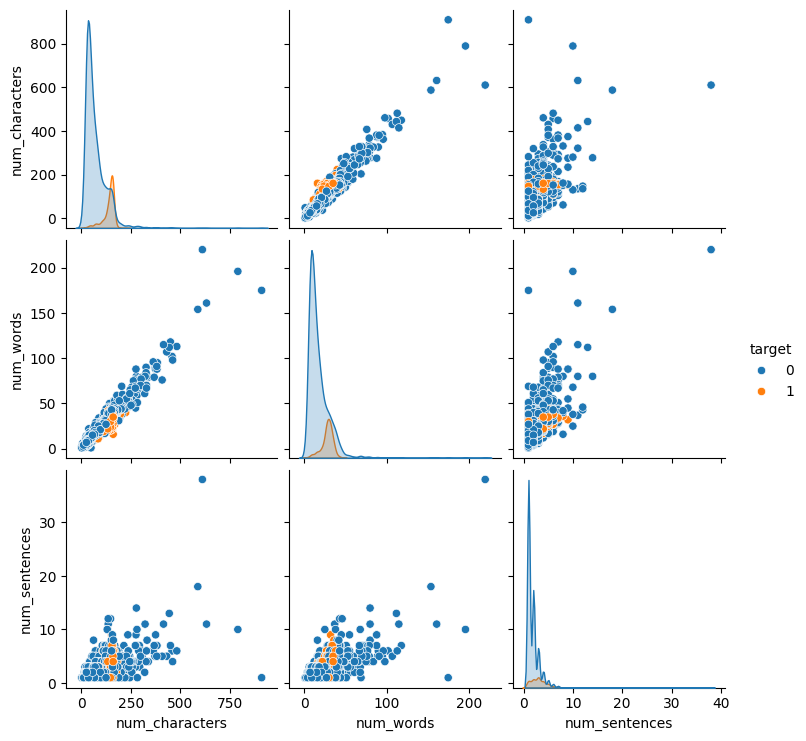

In [291]:
# relationship among them
sns.pairplot(df, hue='target')

<Axes: >

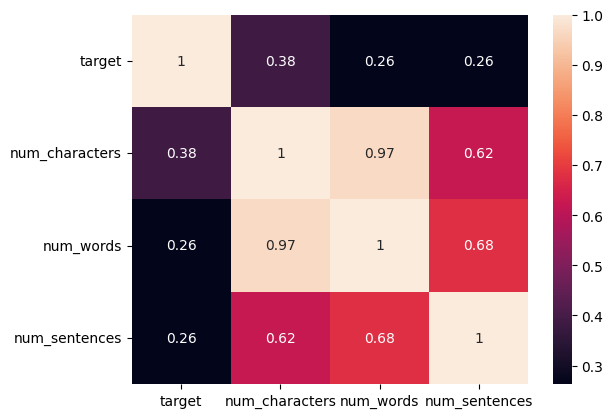

In [292]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [293]:
# num_sentences and num_characters have 0.62, so multicollinearity is present in the dataset
# num_sentences and num_words have 0.68, so multicollinearity is present in the dataset
# num_characters and num_words have 0.97, so high multicollinearity is present in the dataset

# conclusion - use any one col from here
# use num_characters because it highly correlated with the target col

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- removing stop words and punctuation
- Stemming

In [294]:
from nltk.corpus import stopwords
import string


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # cloning is important [:]
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [295]:
transform_text('Hi, How Are you? %% eg. This is Adam, I was going through your book')

'hi eg adam go book'

In [296]:
transform_text('Did you like my presentation on ML?')

'like present ml'

In [297]:
transform_text('I loved the youtube Lectures on Machine Learning. How about you?')

'love youtub lectur machin learn'

In [298]:
print(df['text'][1])
print(transform_text(df['text'][1]))

Ok lar... Joking wif u oni...
ok lar joke wif u oni


In [299]:
print(df['text'][2])
print(transform_text(df['text'][2]))

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18


In [300]:
# what are stop words
from nltk.corpus import stopwords

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [301]:
# punctuation marks
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [302]:
# Stemming
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [303]:
ps.stem('jumping')

'jump'

In [304]:
df['text'].apply(transform_text)

0                                                          go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1                                                                                                                 ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
3                                                                                                   u dun say earli hor u c alreadi say
4                                                                                                  nah think goe usf live around though
                                                                     ...                                                               
5567                                             2nd time tri 2 contact u pound prize 2 claim easi call 087187272008 now1 10p per minut
5568                                            

In [305]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

C:\Users\15105\AppData\Local\Temp\ipykernel_20412\2265465716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24,2,go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37,2,free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives around here though",61,15,1,nah think goe usf live around though


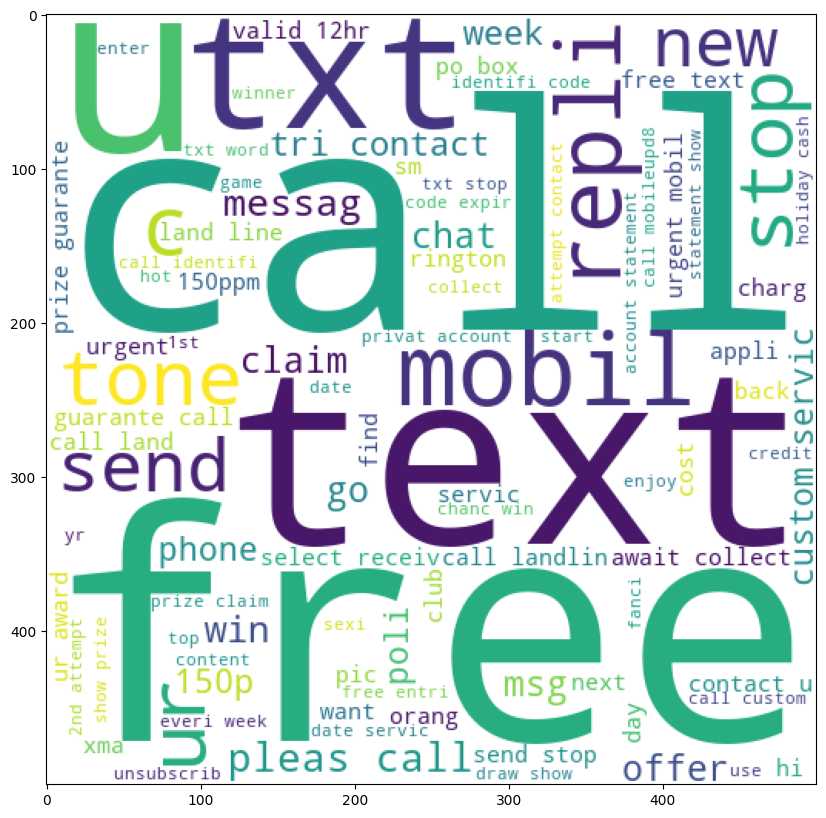

In [306]:
# Word Cloud of Spam
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
span_wc = wc.generate(df.query('target == 1')['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(12, 10))
plt.imshow(span_wc)

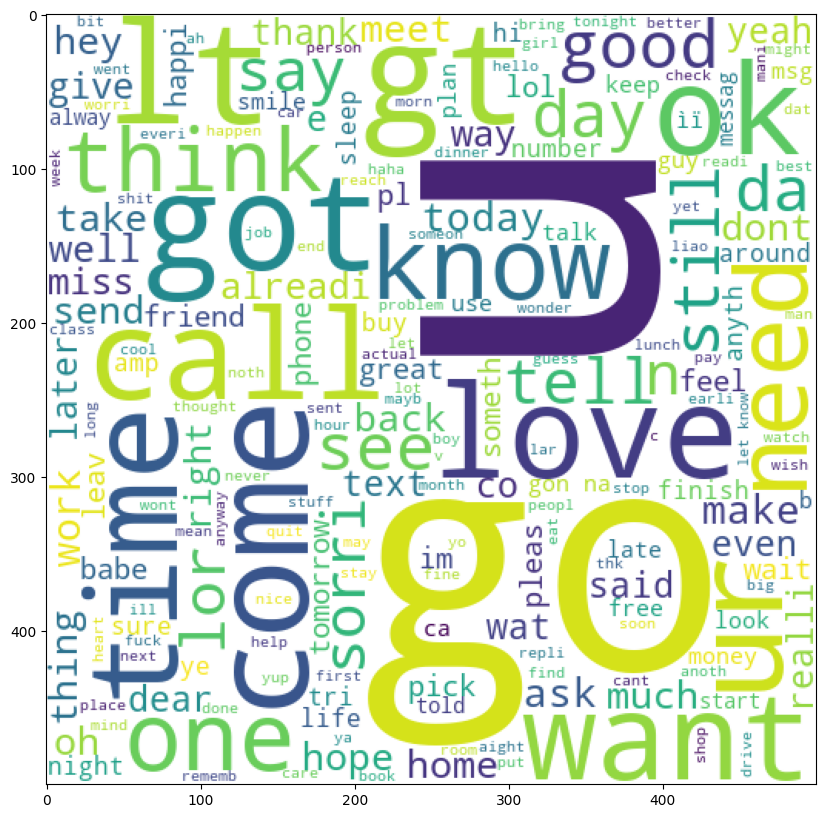

In [307]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
ham_wc = wc.generate(df.query('target == 0')['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(12, 10))
plt.imshow(ham_wc)

In [308]:
# Top 50 words in spam and ham
spam_corpus = []

for msg in df.query('target == 1')['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

# These are total no. of spam words
print(len(spam_corpus))

9939


In [309]:

from collections import Counter

common_spam = pd.DataFrame(Counter(spam_corpus).most_common(30))
print(common_spam)

          0    1
0      call  320
1      free  191
2         2  155
3       txt  141
4      text  122
5         u  119
6        ur  119
7     mobil  114
8      stop  104
9     repli  103
10    claim   98
11        4   97
12    prize   82
13      get   74
14      new   64
15   servic   64
16     tone   63
17     send   60
18   urgent   57
19    nokia   57
20  contact   56
21    award   55
22    phone   52
23     cash   51
24    pleas   51
25     week   49
26      win   48
27        c   45
28  collect   45
29      min   45


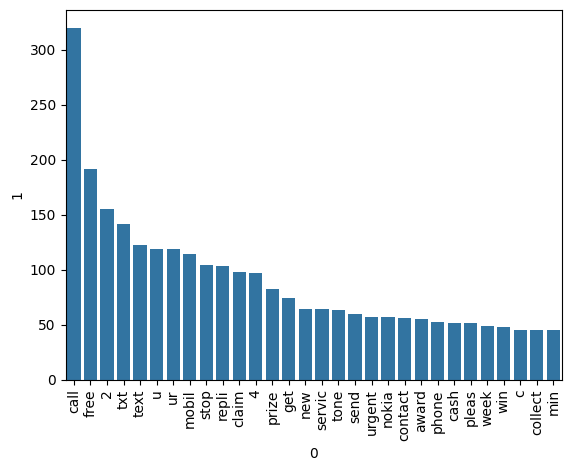

In [310]:
sns.barplot(x=common_spam[0], y=common_spam[1])
plt.xticks(rotation='vertical')
plt.show()

#### Why did we do this, to increase interpretability

In [311]:
ham_corpus = []

for msg in df.query('target == 0')['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

print(len(ham_corpus))

35404


In [312]:
common_ham = pd.DataFrame(Counter(ham_corpus).most_common(30))
print(common_ham)

        0    1
0       u  883
1      go  404
2     get  349
3      gt  288
4      lt  287
5       2  284
6    come  275
7     got  236
8    know  236
9    like  234
10   call  233
11   time  219
12     ok  217
13   love  216
14   good  213
15   want  208
16     ur  197
17    day  190
18   need  170
19    one  165
20    lor  159
21      4  156
22   home  152
23  think  149
24    see  147
25   take  143
26  still  143
27     da  142
28   tell  133
29   make  129


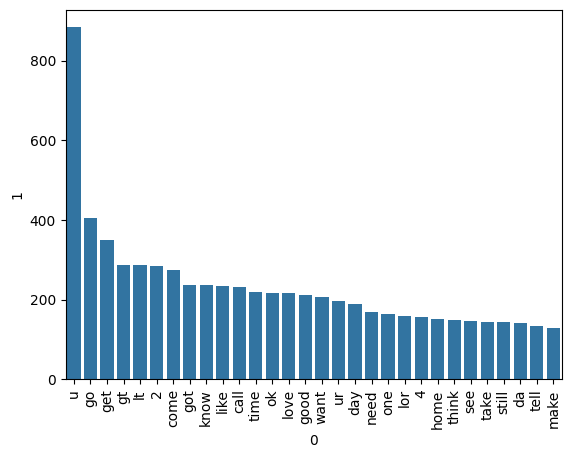

In [313]:
sns.barplot(x=common_ham[0], y=common_ham[1])
plt.xticks(rotation='vertical')
plt.show()

In [314]:
# Vectorization
# 1. Bag of Words
# 2. TFIDF
# 3. Word to Vec
df

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24,2,go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37,2,free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives around here though",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",161,35,4,2nd time tri 2 contact u pound prize 2 claim easi call 087187272008 now1 10p per minut
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other suggestions?",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,125,27,1,guy bitch act like interest buy someth els next week gave us free


In [315]:
# 1. Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(df['transformed_text']).toarray()

print(X.shape)

(5169, 6708)


In [316]:
# 2. TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(df['transformed_text']).toarray()

print(X.shape)

(5169, 3000)


In [317]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [318]:
# Why we chose MinMaxScaler instead of Standard Scaler, because Standard Scaler gives negative values and naive bayes cannot handle that

# After performing the test by applying MinMaxScaler, the precision score decreased, hence it is commented out
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [319]:
# when we added the num_character col to the X and tried, the precision went back to 1.0 but the accuracy decreased slightly, so commented out

# appending the num_character col to X
# X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [320]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X_train.shape)
print(X_test.shape)

(4135, 3000)
(1034, 3000)


## 4. Model Building

In [321]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [322]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [323]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [324]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


#### Conclusion
- mnb for TFIDF vectorizer worked best, gave 100% precision score

In [205]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, \
    GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
knc = KNeighborsClassifier()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
dtc = DecisionTreeClassifier(max_depth=5)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimator=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)

clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [206]:
def train_classifier(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [207]:
train_classifier(svc, X_train, X_test, y_train, y_test)

(0.9758220502901354, 0.9747899159663865)

In [208]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, X_test, y_train, y_test)

    print('For: ', name)
    print('Accuracy: ', current_accuracy)
    print('Precision: ', current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For:  SVC
Accuracy:  0.9758220502901354
Precision:  0.9747899159663865
For:  KN
Accuracy:  0.9052224371373307
Precision:  1.0
For:  NB
Accuracy:  0.9709864603481625
Precision:  1.0
For:  DT
Accuracy:  0.9294003868471954
Precision:  0.8282828282828283
For:  LR
Accuracy:  0.9584139264990329
Precision:  0.9702970297029703
For:  RF
Accuracy:  0.9758220502901354
Precision:  0.9829059829059829


C:\Users\15105\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For:  AdaBoost
Accuracy:  0.960348162475822
Precision:  0.9292035398230089
For:  BgC
Accuracy:  0.9584139264990329
Precision:  0.8682170542635659
For:  ETC
Accuracy:  0.9748549323017408
Precision:  0.9745762711864406
For:  GBDT
Accuracy:  0.9468085106382979
Precision:  0.9191919191919192


C:\Users\15105\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:17:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


For:  xgb
Accuracy:  0.971953578336557
Precision:  0.943089430894309


In [243]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(),
                               'Accuracy': accuracy_scores,
                               'Precision': precision_scores}).sort_values(['Precision'], ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [244]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.971954
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


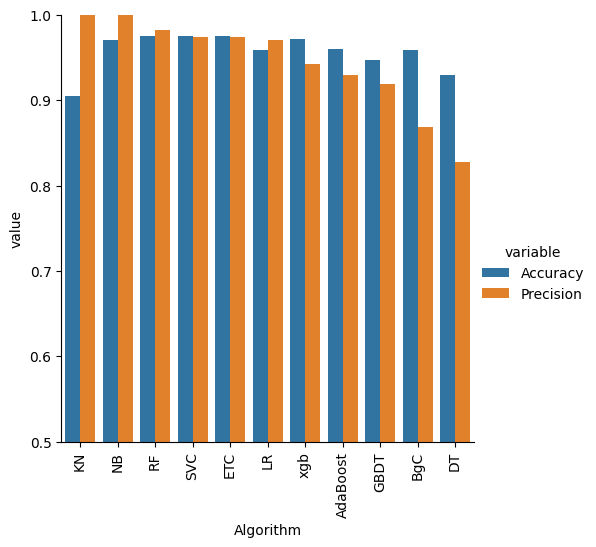

In [245]:
sns.catplot(x='Algorithm',
            y='value',
            hue='variable',
            data=performance_df1,
            kind='bar',
            height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

#### Model Improvement

Uncomment and try when experimenting

In [250]:
# 1. Change the max_features of TfIdf

# temp_df = pd.DataFrame({'Algorithm': clfs.keys(),
#                         'Accuracy_max_ft_3000': accuracy_scores,
#                         'Precision_max_ft_3000': precision_scores}).sort_values('Precision_max_ft_3000',
#                                                                                 ascending=False)
# new_df = performance_df.merge(temp_df, on='Algorithm')

In [251]:
# new_df

In [252]:
# temp_df = pd.DataFrame(
#     {'Algorithm': clfs.keys(), 'Accuracy_scaling': accuracy_scores, 'Precision_scaling': precision_scores}).sort_values(
#     'Precision_scaling', ascending=False)
# 
# new_df_scaled = new_df.merge(temp_df, on='Algorithm')
# 
# temp_df = pd.DataFrame({'Algorithm': clfs.keys(),
#                         'Accuracy_num_chars': accuracy_scores,
#                         'Precision_num_chars': precision_scores}).sort_values('Precision_num_chars', ascending=False)
# 
# new_df_scaled.merge(temp_df, on='Algorithm')

Trying out a combination of best performing classifier

In [253]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [254]:
y_pred = voting.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))

Accuracy:  0.9816247582205029
Precision:  0.9917355371900827


In [255]:
# Applying Stacking
estimators = [('svc', svc), ('nb', mnb), ('et', etc)]
final_estimators = RandomForestClassifier()

from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimators)
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('svc',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('nb', MultinomialNB()),
                               ('et',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [256]:
y_pred = clf.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))

Accuracy:  0.9806576402321083
Precision:  0.946969696969697


In [325]:
import pickle

pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))